In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import os
import cv2

from sklearn.decomposition import PCA

## 802 Presents: Eigenandre and Eigenpedro, the Eigenroommates

I made a shortlist of photogenic landmarks in Berlin: Mauerpark, where I get a hotdog every week, the climbing gym Boulderklub Kreuzberg, where I ascended my first V4 boudlering problem, Mercedes-Platz, where I watched Dune in IMAX and EDEKA, the supermarket where I buy a dozen pork steaks every week. In making that list, I realized that there was one landmark present at each of these places, a landmark that overshadows all other landmarks. This landmark is my Brazilian roommate Pedro, who has roomed with me since the good old days in 802 in San Francisco. Since a "Brazilian Pedro" is tautological, here are some details about him: 

(20, 300, 225, 3)


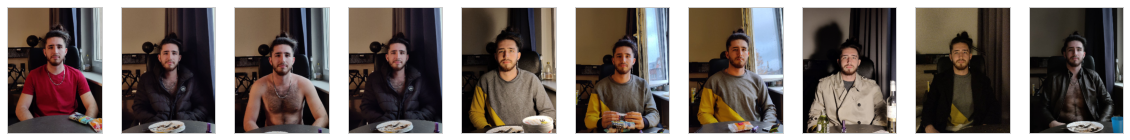

In [8]:
path = './pedro_pics'

def resize_images(path):
    # Resizes images in folder specified in relative <path: string>
    img_data = []
    i = 0
    images = sorted(os.listdir(path))

    for img in images:
        img_path = path + '/' + img

        try:
            # Read image and switch from RGB to BGR
            img = cv2.imread(img_path)[...,::-1]

            # target dim, preserving aspect ratio
            width = 300
            height = int((img.shape[1]/img.shape[0])*300)

            resized_img  = cv2.resize(img, dsize = (height, width), interpolation = cv2.INTER_CUBIC)
            img_data.append(resized_img)
        except:
            pass
    return img_data


imgs = resize_images(path)
# Crucial for imshow: floats need to be in [0,1]
imgs = np.array(imgs, dtype=np.float64) / 255.0
dims = imgs[0].shape

print(imgs.shape)

def show_pedro(n_pedros, pedro_imgs):
    # init pretty image plot
    fig, axs = plt.subplots(1,n_pedros, figsize=(20, 20),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.2))

    for i in range(n_pedros):
        axs[i].imshow(pedro_imgs[i])

daily_pedro = show_pedro(10, imgs)

In this sample of 30 images of a paltry 202,500 dimensions (300x225x3) each, we see Pedro in 9 natural states over the course of a bleak Friday in Berlin. Red-Shirt Pedro wakes up to bright sunlight, morphs into Shirtless Pedro, before putting on his jacket to turn into Jacket Pedro - Berlin's weather has been punishingly fickle over the last few weeks. Sweater Weather Pedro is what you would *expect* to see on any given day and time (listening, of course, to sad Radiohead), oversampled here in his preferred states of resting, rolling a cigarette and smoking a cigarette respectively. Let's see if PCA can pick up on the iconic yellow-streak sweater, with just two components to work with:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original Image')

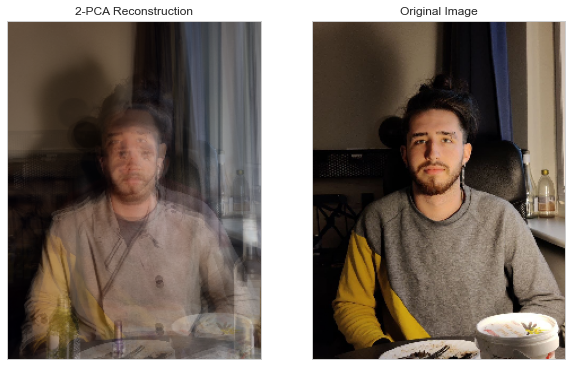

In [9]:
# flatten
flat_imgs = imgs.reshape(len(imgs), 300*225*3)

# Project down to two components
model = PCA(2)

# Transform each image from 202,500-basis representation to 2-basis PCA representation
trans_imgs = model.fit_transform(flat_imgs)
# To visualize, transform back to standard basis
inv_trans = model.inverse_transform(trans_imgs)

# Make sure transformations are happening as expected
assert trans_imgs.shape[0] == flat_imgs.shape[0] == inv_trans.shape[0]

# See side by side
fig, axs = plt.subplots(1, 2, sharey=True, subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.2), figsize = (10,10))

# Reconstructing Pedro in the iconic yellow sweater
n = 3
axs[0].imshow(inv_trans[4].reshape(*dims))
axs[0].set_title("2-PCA Reconstruction")
axs[1].imshow(imgs[4])
axs[1].set_title("Original Image")

PCA has done a good job of capturing the yellow streak, but conflates the rest of the sweater with the overcoat he wore on a date at the synagogue later in the evening. It also manages to reconstruct our stockpile of mouldy plates and our repurposed yogurt container. There is even the phantom of a wine bottle. Indeed, (good) food and wine are highly correlated in our room. The double-eye artifacts are evidence *against* my claim that I am a good photographer. Ideally, I should have centered his face better and/or centered and cropped his face across the images for better results. Nonetheless, the reconstruction gets lighting, figure and color mostly right - if you squint enough, they look identical. More on the degree to which one needs to squint below,

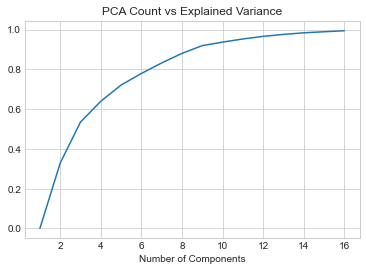

PC1 and PC2 explain 33% and 21% of the total variance 
 Total explained variance is 53%


In [10]:
full_model = PCA(0.99)
full_model.fit_transform(flat_imgs)

vars = np.cumsum(full_model.explained_variance_ratio_).tolist()
plt.plot(range(1, len(vars) + 2), [0] + vars)
plt.title("PCA Count vs Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel
plt.show()

print(f'PC1 and PC2 explain {round(model.explained_variance_ratio_[0]*100)}% and {round(model.explained_variance_ratio_[1]*100)}% of the total variance',
      '\n', f'Total explained variance is {round(sum(model.explained_variance_ratio_)*100)}%')

With just two components we can explain 53% of the total variance in the 30 photos of Pedro. With just 4 more components, we explain 80% - enough to glean the brand of tobacco we smoke after class, after breakfast, after dinner, and after submitting an assignment. Collapsed to just two components, we have a 2D Pedro space that is much easier to visualize, however:

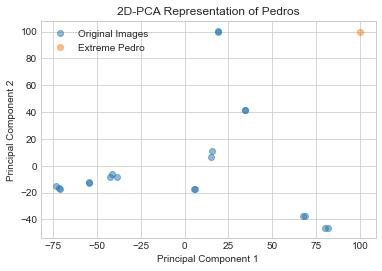

In [11]:
# Visualize points 
plt.figure()
c_map = plt.cm.get_cmap('jet', 2)

plt.plot(trans_imgs[:,0], trans_imgs[:,1], 'o', alpha = 0.5, label = "Original Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D-PCA Representation of Pedros")

# Let's see what an unlikely Pedro state looks like
far_point = [100,100] 
plt.plot(*far_point, 'o', alpha = 0.5, label = 'Extreme Pedro')
plt.legend()
plt.show()

Each point here corresponds to a single image of Pedro. This is insane, as we needed 202,500 'axes' to represent this before. The plot reveals quite a bit. In the tight overlap of pairs/triplets of points, the plot reveals our collective laziness in taking photos of each other over spaced intervals. Instead, we had 9 or so photoshoots over the course of the day: first in the afternoon, then after I got back from a café, then before Pedro went out for a synagogue party involving an eigenfashionable amount of 'prescription' medicine. I also placed a point called 'Extreme Pedro' at the upper quadrant edge - a Pedro that is really 'unalike' other Pedros today. This Pedro is scaled by 100 along each principal component:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


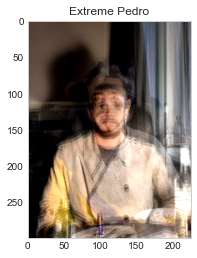

In [12]:
plt.imshow(model.inverse_transform(far_point).reshape(*dims))
plt.grid(False)
plt.title("Extreme Pedro")
plt.show()

Extreme Pedro wears two jackets, two sets of faces, is lit from the window and my table lamp, and wears a kind of sneaky grin. To understand why this appears, we can examine each principal component individually to see what they are trying to capture. In other words, we can take a look at Eigenpedros:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


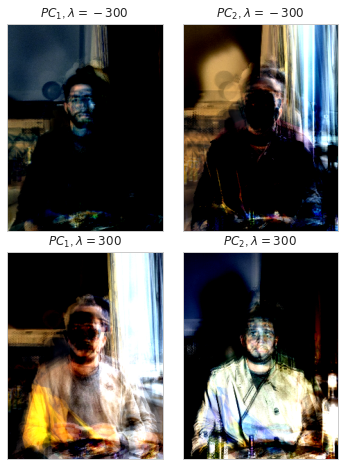

In [13]:
# Extreme values : what does each PC look like?
# Eigenpedros: what happens as we move extremely along each PC
fig, axs = plt.subplots(2, 2, figsize=(6, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1), tight_layout = True)

eigenvals = [-300,300]
for i, ax in enumerate(axs.flat):
    ax.imshow(model.components_[i%2].reshape(*dims)*eigenvals[i//2])
    ax.set_title(f'$PC_{i%2 + 1}$, $\lambda={eigenvals[i//2]}$ ')

Roughly, each new component describes a sliding scale of aggregated polar features of Pedro. For example, with lots of components, this can mean shirt on/off, jacket on/off. With just two components, more features are aggregated: it looks like PCA1 (left column) is capturing his yellow sweater and leather jacket/black jacket, his being lit from the side by the sunlit window, and details in the background of our room. Presumably, these background details were available only when the sun was out/earlier in the day, because my phone camera with low dynamic range may not have been able to pick these up later in the evening. In fact, PC2 seems to pick up details from later in the day - Pedro being underlit by my table lamp, his coat, dim rim lights on his face from a modestly bright window, and table accoutrements like the wine bottle and plates. Finally, we can look at the initial set of images against their PCA-reduced counterparts,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


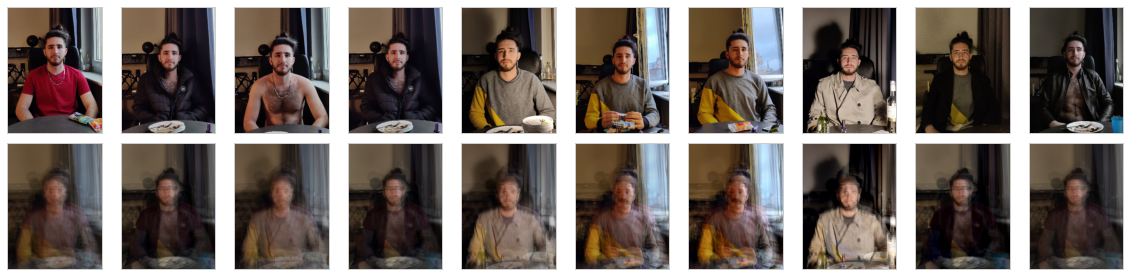

In [14]:
def compare_pedros(n_pedros, pedro_imgs, trans_pedros):
    fig, axs = plt.subplots(2, n_pedros, figsize=(20, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0, wspace=0.2))


    for i in range(2):
        for img in range(n_pedros):
            if i == 1:
                axs[i,img].imshow(trans_pedros[img].reshape(*dims))
            else:
                axs[i,img].imshow(pedro_imgs[img])


compare_pedros(10, imgs, inv_trans)

On the whole, PCA seems to be uncomfortable with Pedro's state of shirtlessness, treating it as an even mix between components (it is *not*, and the hairiness is much scarier in person). Pedro with Beige Coat (the Regal Pedro, often sighted at art galleries) has the best reproduction to my eye - this is perhaps because it is the most unalike the others (strong shadow, strong color and lighting), and PCA will project to maximize variance. 

I'm so glad to have Pedro in my *life*. He isn't just a landmark. He is my *lifemark*. 